#### Importações

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregamento dos Dados

In [55]:
df_desenrola = pd.read_csv('dados_desenrola.csv', sep=';')
df_desenrola

,DATA_BASE,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
0,202309,2,AC,49906,BB,142,"1421991,10"
1,202309,2,AC,10045,BRADESCO,17,"94097,52"
2,202309,2,AC,49944,BTG PACTUAL,7,"37788,79"
3,202309,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
4,202309,2,AC,51884,INTER,4,"12306,86"
...,...,...,...,...,...,...,...
6917,202411,3,SP,30379,SANTANDER,692,"8651787,10"
6918,202411,3,TO,49906,BB,4,"107583,69"
6919,202411,3,TO,10045,BRADESCO,1,"18159,08"
6920,202411,3,TO,10069,ITAU,10,"31304,01"


#### Pré-processamento e Limpeza de Dados

In [56]:
df_desenrola.shape

(6922, 7)

In [57]:
df_desenrola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DATA_BASE                     6922 non-null   int64 
 1   TIPO_DESENROLA                6922 non-null   int64 
 2   UNIDADE_FEDERACAO             6922 non-null   object
 3   COD_CONGLOMERADO_FINANCEIRO   6922 non-null   int64 
 4   NOME_CONGLOMERADO_FINANCEIRO  6922 non-null   object
 5   NUMERO_OPERACOES              6922 non-null   int64 
 6   VOLUME_OPERACOES              6922 non-null   object
dtypes: int64(4), object(3)
memory usage: 378.7+ KB


In [58]:
# Corrigindo o formato dos dados na coluna VOLUME_OPERACOES
df_desenrola['VOLUME_OPERACOES'] = (
    df_desenrola['VOLUME_OPERACOES']
    .str.replace(',', '.', regex=True)
    .astype(float)
)


In [59]:
type(df_desenrola['VOLUME_OPERACOES'][1])

numpy.float64

In [60]:
df_desenrola.head()

,DATA_BASE,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
0,202309,2,AC,49906,BB,142,1421991
1,202309,2,AC,10045,BRADESCO,17,94098
2,202309,2,AC,49944,BTG PACTUAL,7,37789
3,202309,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,247431
4,202309,2,AC,51884,INTER,4,12307


In [61]:
df_desenrola.describe()

,DATA_BASE,TIPO_DESENROLA,COD_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
count,6922,6922,6922,6922,6922
mean,202375,1,1479006,350,861387
std,44,1,8748098,1431,4910157
min,202309,1,10045,1,0
25%,202312,1,30290,4,4077
50%,202403,1,49944,25,60451
75%,202407,2,51750,182,474873
max,202411,3,86829827,46465,214576047


In [62]:
df_desenrola.isnull().sum()

DATA_BASE                       0
TIPO_DESENROLA                  0
UNIDADE_FEDERACAO               0
COD_CONGLOMERADO_FINANCEIRO     0
NOME_CONGLOMERADO_FINANCEIRO    0
NUMERO_OPERACOES                0
VOLUME_OPERACOES                0
dtype: int64

#### Análise Exploratória de Dados (EDA)

In [70]:
# Ordem do tipo mais usado do programa
df_tipos = df_desenrola['TIPO_DESENROLA'].value_counts()
df_tipos

TIPO_DESENROLA
1    4249
2    2051
3     622
Name: count, dtype: int64

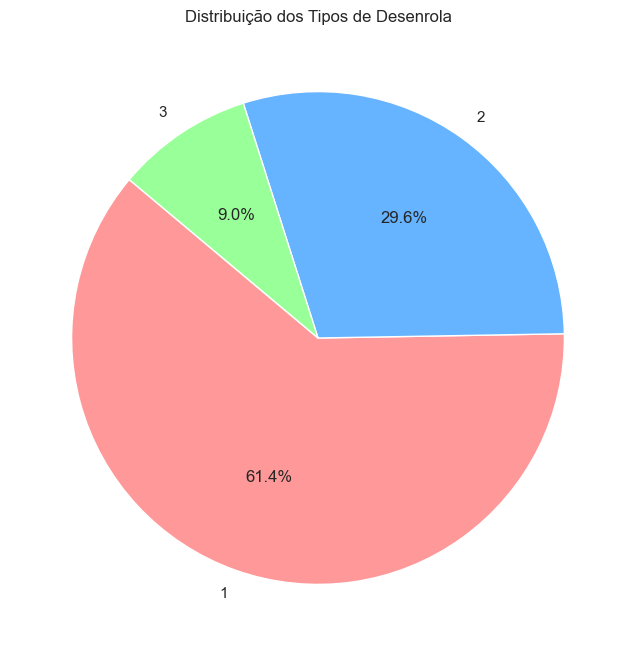

In [65]:
plt.figure(figsize=(8, 8))
plt.pie(df_tipos, labels=df_tipos.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuição dos Tipos de Desenrola')
plt.show()

In [66]:
# Conglomerado com maior numero de operações totais, bancos mais ativos 
df_agrupado = df_desenrola.groupby(['NOME_CONGLOMERADO_FINANCEIRO'])['NUMERO_OPERACOES'].sum()
df_agrupado.sort_values(ascending=False).head(10)
df_top10 = df_agrupado.reset_index().sort_values(by='NUMERO_OPERACOES', ascending=False).head(10)
df_top10

,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES
52,NUBANK,491137
14,CAIXA ECONÔMICA FEDERAL,400789
11,BTG PACTUAL,332027
51,ITAU,315899
53,SANTANDER,295655
50,INTER,212835
9,BRADESCO,122665
2,BB,117329
8,BMG,57938
13,C6 BANK,29540


C:\Users\ricar\AppData\Local\Temp\ipykernel_1988\4186247159.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, y='NOME_CONGLOMERADO_FINANCEIRO', x='NUMERO_OPERACOES', palette='Blues_r')


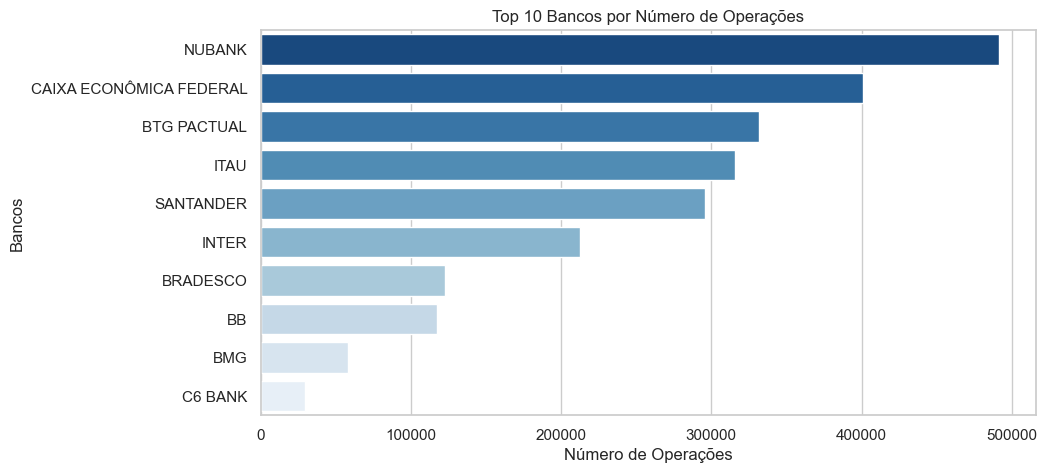

In [67]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.barplot(data=df_top10, y='NOME_CONGLOMERADO_FINANCEIRO', x='NUMERO_OPERACOES', palette='Blues_r')

plt.title('Top 10 Bancos por Número de Operações')
plt.xlabel('Número de Operações')
plt.ylabel('Bancos')

plt.show()

In [68]:
# Top 10 estados com maior volume de dividas renegociadas
df_estados = df_desenrola.groupby(['UNIDADE_FEDERACAO'])['VOLUME_OPERACOES'].sum()
df_estados.sort_values(ascending=False).head(10)
df_estados_top10 = df_estados.reset_index().sort_values(by='VOLUME_OPERACOES', ascending=False).head(10)
df_estados_top10

,UNIDADE_FEDERACAO,VOLUME_OPERACOES
25,SP,1822828505
18,RJ,627571220
10,MG,489286159
17,PR,338434630
22,RS,305018053
4,BA,301806916
23,SC,211709256
15,PE,207252615
5,CE,199073530
8,GO,181182614


C:\Users\ricar\AppData\Local\Temp\ipykernel_1988\2377292123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_estados_top10, y='UNIDADE_FEDERACAO', x='VOLUME_OPERACOES', palette='Blues_r')


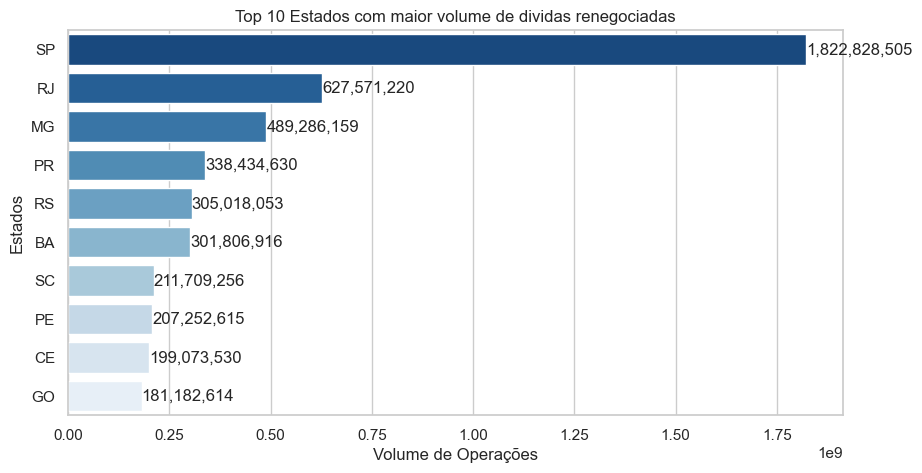

In [69]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5)) 

sns.barplot(data=df_estados_top10, y='UNIDADE_FEDERACAO', x='VOLUME_OPERACOES', palette='Blues_r')

plt.title('Top 10 Estados com maior volume de dividas renegociadas')
plt.xlabel('Volume de Operações')
plt.ylabel('Estados')

for index, value in enumerate(df_estados_top10['VOLUME_OPERACOES']):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.show()

#### Conclusões
O tipo mais usado no período de agosto-setembro de 2023 foi o 1, que corresponde as faixas 1 e 2 do programa Desenrola Brasil.

O banco mais ativo no programa no período foi o Nubank, seguido da Caixa Econômica Federal e BTG Pactual respectivamente.

O estado com maior volume de renegociações foi São Paulo com R$1,822,828,505 renegociados no período.